In [22]:
import os
import librosa
import pandas as pd

In [23]:
BASE_DIR = os.path.abspath(os.curdir)
Dataset_Dir = os.path.join('Datasets','RAVDESS_DATASET')
print(BASE_DIR)

f:\TECHNO\3rd_Sem\ML_project


In [24]:
#get the list of all actors under ravdess dataset
actors = os.listdir(os.path.join(BASE_DIR, Dataset_Dir))
actors

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

## code emotion
>emotion
> - 1:'neutral'
> - 2:'calm'
> - 3:'happy'
> - 4:'sad'
> - 5:'angry'
> - 6:'fear'
> - 7:'disgust'
> - 8:'surprise'

In [25]:
emotion_dictionary = {
        1:'neutral',
        2:'calm',
        3:'happy',
        4:'sad',
        5:'angry',
        6:'fearful',
        7:'disgust',
        8:'surprised'
    }

In [26]:
def find_emotion(filename):
    parta,partb = filename.split('.')
    codes = parta.split('-')
    #print(*codes)
    return int(codes[2])

In [27]:
#get the list of voice-samples of each actor and access all samples one by one
file_paths = []
file_emotion = []
for actor in actors:
    base_path_to_each_actor = os.path.join(BASE_DIR,Dataset_Dir,actor)
    voice_samples = os.listdir(base_path_to_each_actor)
    for sample in voice_samples:
        print(os.path.join(base_path_to_each_actor,sample))
        file_paths.append(os.path.join(base_path_to_each_actor,sample))
        file_emotion.append(find_emotion(sample))
        print(f"Emotion for file - {sample} : {emotion_dictionary[find_emotion(sample)]}")

f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-01-01-01.wav
Emotion for file - 03-01-01-01-01-01-01.wav : neutral
f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-01-02-01.wav
Emotion for file - 03-01-01-01-01-02-01.wav : neutral
f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-02-01-01.wav
Emotion for file - 03-01-01-01-02-01-01.wav : neutral
f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_DATASET\Actor_01\03-01-01-01-02-02-01.wav
Emotion for file - 03-01-01-01-02-02-01.wav : neutral
f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_DATASET\Actor_01\03-01-02-01-01-01-01.wav
Emotion for file - 03-01-02-01-01-01-01.wav : calm
f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_DATASET\Actor_01\03-01-02-01-01-02-01.wav
Emotion for file - 03-01-02-01-01-02-01.wav : calm
f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_DATASET\Actor_01\03-01-02-01-02-01-01.wav
Emotion for file - 03-01-02-01-02-01-01.wav : calm
f:\TECHNO\3rd_S

## DataFrame set up

In [28]:
df = pd.DataFrame(list(zip(file_emotion,file_paths)), columns=['Emotion','Path'])
df

Emotion                                               Path
0           1  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1           1  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
2           1  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
3           1  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
4           2  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
...       ...                                                ...
1435        8  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1436        8  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1437        8  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1438        8  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1439        8  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...

[1440 rows x 2 columns]

In [29]:
df.Emotion.replace(emotion_dictionary,inplace=True)
df

Emotion                                               Path
0       neutral  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1       neutral  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
2       neutral  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
3       neutral  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
4          calm  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
...         ...                                                ...
1435  surprised  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1436  surprised  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1437  surprised  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1438  surprised  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...
1439  surprised  f:\TECHNO\3rd_Sem\ML_project\Datasets\RAVDESS_...

[1440 rows x 2 columns]

In [30]:
df.to_csv("Emotion_path_mapped.csv", index="False")

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\RIMI MONDAL\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


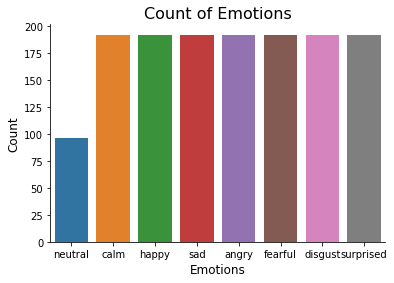

In [32]:
plt.title('Count of Emotions', size=16)
sns.countplot(df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()